# Mercari price prediction
## Data preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_final = pd.read_csv("C:/Users/rafal/Desktop/DS/Merceri price/data_final.csv")

In [4]:
data_final.head()

,Unnamed: 0,item_condition_id,price,shipping,3,4,5,6,7,8,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0,1,16.0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,39.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,50.0,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,3,2,10.0,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,3,12.0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data_final.drop(columns = 'Unnamed: 0', inplace = True)

In [5]:
y = data_final['price'].copy()
data_final.drop(columns = 'price', inplace = True)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(data_final)

C:\Users\rafal\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\rafal\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [7]:
del data_final

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [9]:
del X, y

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data_final = pd.read_csv("C:/Users/rafal/Desktop/DS/Merceri price/data_final.csv")
data_final.drop(columns = 'Unnamed: 0', inplace = True)
y = data_final['price'].copy()
data_final.drop(columns = 'price', inplace = True)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(data_final)
del data_final
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
del X, y

C:\Users\rafal\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\rafal\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## Modeling
### Linear Regression
#### Fitting the model

In [44]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [45]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
y_pred = lin_reg.predict(X_test)

In [4]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [48]:
lin_reg_r2 = r2_score(y_test, y_pred)
lin_reg_r2

-3.889085495376626e+25

In [14]:
mean_absolute_error(y_test, y_pred)

3917821049503.744

In [11]:
from sklearn.ensemble import RandomForestRegressor

In [12]:
rand_for = RandomForestRegressor(n_estimators = 100)

### Gradient boosting

In [2]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

C:\Users\rafal\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:25:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [7]:
import pickle
filename = 'xgb.sav'

In [8]:
pickle.dump(xgb, open(filename, 'wb'))

In [9]:
loaded_model = pickle.load(open(filename, 'rb'))


[10:21:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.3004323974948357


In [10]:
y_pred_ = loaded_model.predict(X_test)

In [11]:
mean_absolute_error(y_test, y_pred_)

NameError: name 'mean_absolute_error' is not defined

In [6]:
mean_absolute_error(y_test, y_pred_)/np.mean(y_test)

0.5667988444770646

In [7]:
r2_score(y_test, y_pred_)

0.33195487926857026

In [12]:
from xgboost import plot_tree

ExecutableNotFound: failed to execute ['dot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

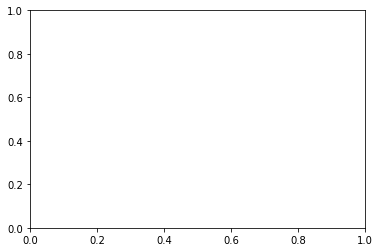

In [13]:
plot_tree(loaded_model)

### Principal components analysis

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1000)

In [17]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=1000, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [18]:
print(pca.explained_variance_ratio_)

[0.00443277 0.00263803 0.00255027 0.0023468  0.00220149 0.00205164
 0.00197784 0.001889   0.00179164 0.00174326 0.00168105 0.00163496
 0.00162366 0.00159039 0.00154179 0.00151504 0.00147451 0.0014459
 0.00143016 0.00141241 0.00136202 0.00132606 0.00131739 0.00129089
 0.00128264 0.00126059 0.00122031 0.00121147 0.00118836 0.0011774
 0.00115727 0.00113168 0.00112724 0.00112074 0.00109962 0.00109061
 0.00107944 0.00107585 0.00105651 0.00104828 0.00104484 0.00103609
 0.00102901 0.00102434 0.00101996 0.00101188 0.00100726 0.00099953
 0.00099384 0.00098677 0.00098034 0.00098002 0.00097434 0.00096744
 0.00096614 0.00095552 0.00094915 0.00094643 0.00094282 0.00093488
 0.00093174 0.00092593 0.00092384 0.00092163 0.00091418 0.00090938
 0.00090569 0.00090197 0.00089614 0.00088989 0.00088424 0.00088327
 0.00087628 0.00086947 0.00086649 0.00086549 0.00086082 0.00085612
 0.00085148 0.00084631 0.00084535 0.00084069 0.00083862 0.00083385
 0.0008314  0.0008286  0.00082436 0.00082183 0.00081942 0.000817

In [19]:
sum(pca.explained_variance_ratio_)

0.5073324098294756

### ANN

In [25]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import optimizers

In [20]:
X_train.shape

(40000, 4346)

In [26]:
#Building the ANN
regressor = Sequential()
regressor.add(Dense(units = 2200, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4346))
regressor.add(Dropout(rate = 0.1))
regressor.add(Dense(units = 1000, kernel_initializer = 'uniform', activation = 'relu'))
regressor.add(Dropout(rate = 0.1))
regressor.add(Dense(units = 250, kernel_initializer = 'uniform', activation = 'relu'))
regressor.add(Dropout(rate = 0.1))
regressor.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'relu'))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [28]:
regressor.fit(X_train, y_train, batch_size = 256, epochs = 50)

Epoch 1/50
40000/40000 [==============================] - 52s 1ms/step - loss: 808.8099 - mean_absolute_error: 12.8985
Epoch 2/50
40000/40000 [==============================] - 52s 1ms/step - loss: 591.8345 - mean_absolute_error: 11.3914
Epoch 3/50
40000/40000 [==============================] - 52s 1ms/step - loss: 436.4720 - mean_absolute_error: 10.6034
Epoch 4/50
40000/40000 [==============================] - 52s 1ms/step - loss: 360.1309 - mean_absolute_error: 9.7296
Epoch 5/50
40000/40000 [==============================] - 52s 1ms/step - loss: 270.2222 - mean_absolute_error: 8.7500
Epoch 6/50
40000/40000 [==============================] - 52s 1ms/step - loss: 226.8965 - mean_absolute_error: 8.1511
Epoch 7/50
40000/40000 [==============================] - 52s 1ms/step - loss: 215.5412 - mean_absolute_error: 7.6202
Epoch 8/50
40000/40000 [==============================] - 52s 1ms/step - loss: 199.2774 - mean_absolute_error: 7.4218
Epoch 9/50
40000/40000 [=============================

In [29]:
y_pred_ann = regressor.predict(X_test)

In [31]:
mean_absolute_error(y_test, y_pred_ann)

16.97301672539711

In [32]:
r2_score(y_test, y_pred_ann)

-5.2080622869687385

In [33]:
max(y_pred_ann)

array([2231.4517], dtype=float32)